# TP : Classification des Emails en Spam ou Ham avec Naive Bayes

Dans ce notebook, nous allons explorer le problème de la classification des emails en utilisant l'algorithme Naive Bayes. La classification des emails est un problème courant dans le domaine du traitement du langage naturel et est souvent utilisée pour filtrer les spams des boîtes de réception.

L'algorithme Naive Bayes est un modèle probabiliste simple mais puissant qui est couramment utilisé pour la classification de texte. Nous allons utiliser la bibliothèque scikit-learn pour implémenter l'algorithme Naive Bayes et évaluer sa performance sur un jeu de données contenant des emails étiquetés comme spam ou ham (non-spam).
LA Formule de Bayes : ![Description de l'image](image_nb.png)

Ce notebook est divisé en plusieurs étapes :
1. **Préparation des données :** Nous allons importer et prétraiter le jeu de données contenant des emails.
2. **Entraînement du modèle :** Nous allons entraîner un classificateur Naive Bayes sur les données d'entraînement.
3. **Évaluation du modèle :** Nous évaluerons les performances du modèle sur un ensemble de test en utilisant des mesures telles que la précision, le rappel et la matrice de confusion.
4. **Prédiction :** Enfin, nous utiliserons le modèle entraîné pour prédire les étiquettes (spam ou ham) pour de nouveaux emails.

Commençons par la première étape : la préparation des données.


- importations des librairies:

In [73]:
# 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score

- Chargement des données: On Récuperer du dataset "spam-ham-dataset.csv"

In [74]:
df = pd.read_csv("spam_ham_dataset.csv")
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [75]:
df.describe()

,Unnamed: 0,label_num
count,5171.000000,5171.000000
mean,2585.000000,0.289886
std,1492.883452,0.453753
min,0.000000,0.000000
25%,1292.500000,0.000000
50%,2585.000000,0.000000
75%,3877.500000,1.000000
max,5170.000000,1.000000


In [76]:
df['label'].value_counts()

label
ham     3672
spam    1499
Name: count, dtype: int64

In [77]:
# On ajouter une nouvelle colonne représentant la longueur du texte dans un DataFrame
df['length'] = df['text'].apply(len)
df.head()

,Unnamed: 0,label,text,label_num,length
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,327
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1,414
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,336


In [78]:
df.isnull().sum()

Unnamed: 0    0
label         0
text          0
label_num     0
length        0
dtype: int64

In [79]:
df.duplicated().sum()

0

In [80]:
# Supprimer les colonnes inutiles
df = df.drop(['Unnamed: 0'], axis=1)

- Exploration des donneés:

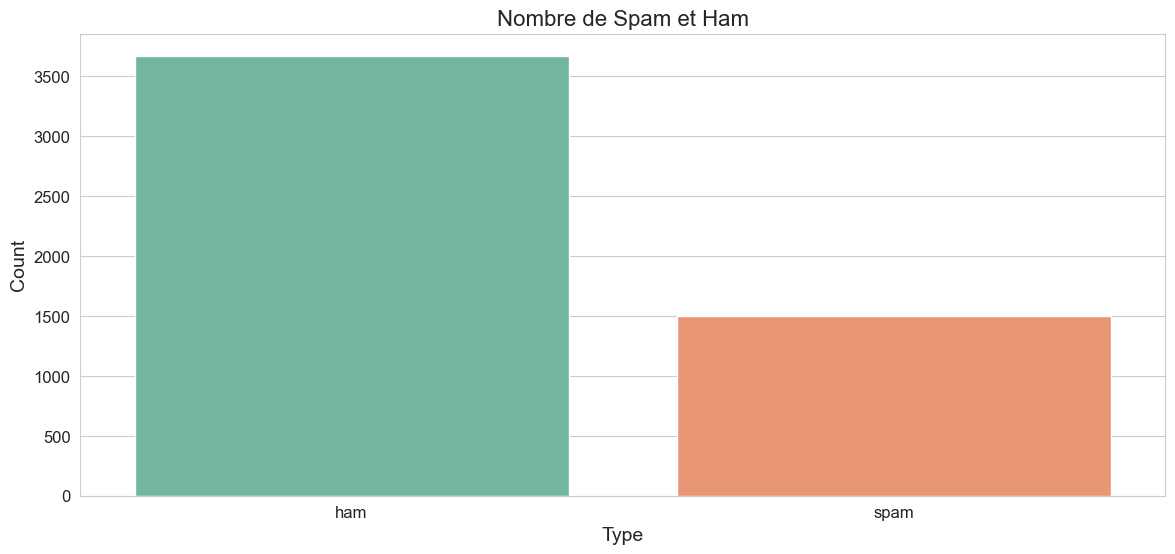

In [81]:
# Distribution de données:
plt.figure(figsize=(14,6))
sns.set_style('whitegrid') 
sns.countplot(x='label', data=df, palette='Set2') 
plt.title('Nombre de Spam et Ham', fontsize=16) 
plt.xlabel('Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12) 
plt.show()

la distribution de la longueur du texte

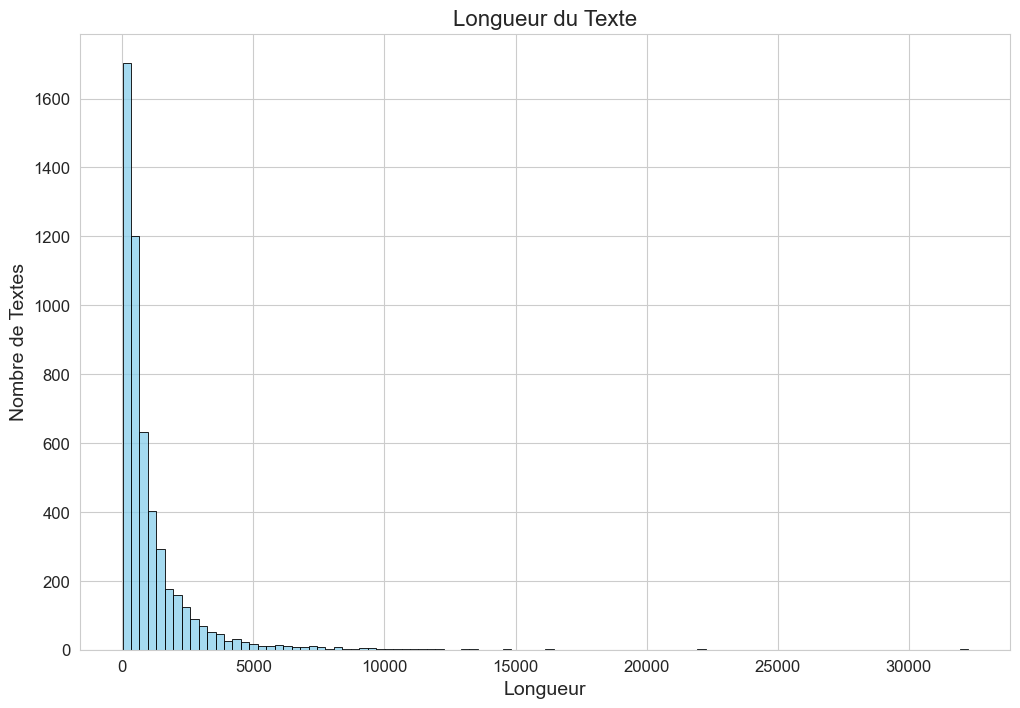

In [82]:
# Graphique pour la distribution de la longueur du texte
plt.figure(figsize=(12,8))
sns.set_style('whitegrid') 
sns.histplot(x='length', data=df, bins=100, color='skyblue', edgecolor='black')  
plt.title('Longueur du Texte', fontsize=16) 
plt.xlabel('Longueur', fontsize=14)  
plt.ylabel('Nombre de Textes', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Distribution des spams et des hams par longueur du texte

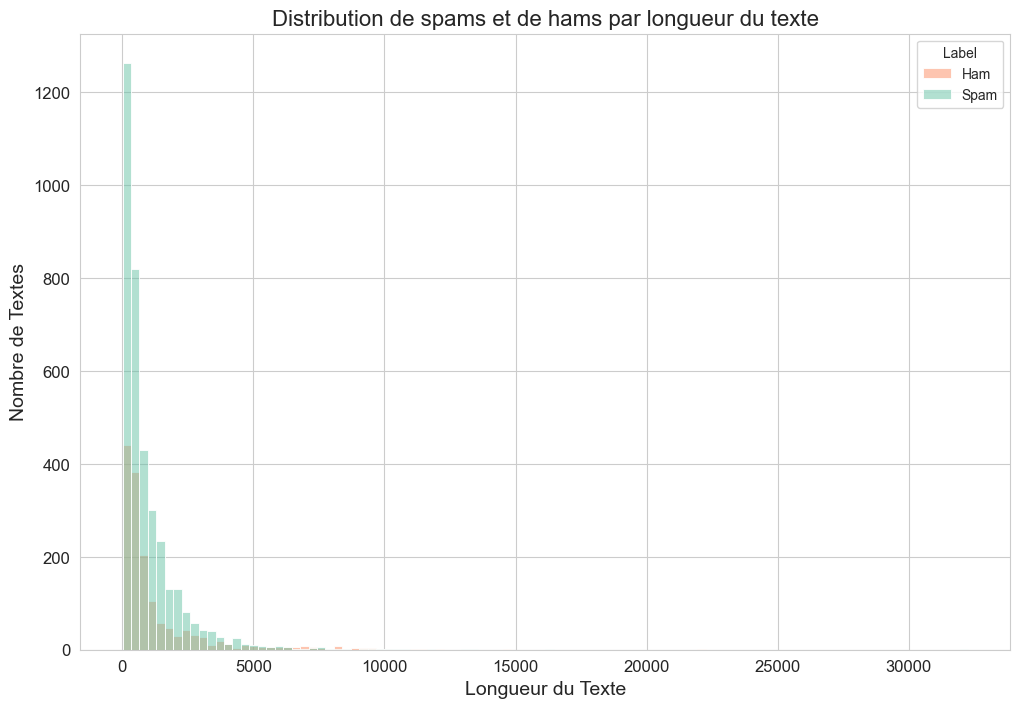

In [83]:
plt.figure(figsize=(12,8))
sns.set_style('whitegrid')  
sns.histplot(data=df, x='length', hue='label', bins=100, palette='Set2', legend=True)
plt.title('Distribution de spams et de hams par longueur du texte', fontsize=16)
plt.xlabel('Longueur du Texte', fontsize=14) 
plt.ylabel('Nombre de Textes', fontsize=14) 
plt.xticks(fontsize=12) 
plt.yticks(fontsize=12) 
plt.legend(title='Label', labels=['Ham', 'Spam'])
plt.show()

- Séparation des données:

In [84]:
# Diviser les données en features (X) et labels (y)
X = df['text']
y = df['label_num']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"dim(X_train,X_test) = ({X_train.shape},{X_test.shape}), dim(Y_train,Y_test) = ({y_train.shape},{y_test.shape})")

dim(X_train,X_test) = ((4136,),(1035,)), dim(Y_train,Y_test) = ((4136,),(1035,))


- Transormation des données: codage de texte.

In [85]:
# Vectoriser les données textuelles
vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

- Entraînement du model en utilisant Naives Bayes:

In [86]:
# Entraîner le modèle Naive Bayes
classifier = MultinomialNB()
classifier.fit(X_train_counts, y_train)

MultinomialNB()

- Faire des prédictions sur l'ensemble de test:

In [87]:
y_pred = classifier.predict(X_test_counts)

In [94]:
# Obtenir les probabilités prédites pour chaque classe dans l'ensemble de test
probabilities = classifier.predict_proba(X_test_counts)
probabilities

array([[1.00000000e+00, 4.33123079e-25],
       [0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 9.43204245e-74],
       ...,
       [1.02671627e-22, 1.00000000e+00],
       [9.99873760e-01, 1.26239882e-04],
       [1.00000000e+00, 7.50495653e-39]])

les probabilités prédites pour les 5 premiers échantillons avec les classes associées

In [96]:
# Obtenir les classes associées à chaque probabilité
classes = classifier.classes_

# Afficher les probabilités prédites pour les 5 premiers échantillons avec les classes associées
print("Probabilities and associated classes for the first 5 samples:")
for i, probs in enumerate(probabilities[:5]):
    print(f"Sample {i+1}:")
    for j, prob in enumerate(probs):
        print(f"    Class {classes[j]}: {prob}")

Probabilities and associated classes for the first 5 samples:
Sample 1:
    Class 0: 1.0
    Class 1: 4.331230789232038e-25
Sample 2:
    Class 0: 0.0
    Class 1: 1.0
Sample 3:
    Class 0: 1.0
    Class 1: 9.432042453307737e-74
Sample 4:
    Class 0: 1.0
    Class 1: 0.0
Sample 5:
    Class 0: 1.0
    Class 1: 0.0


### Evaluation de model:

In [88]:
# Calculer la précision
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9719806763285024


- classification report:

In [92]:
# classification report
print ('Classification report on CategoricalNB:')
print('\n')
print(classification_report(y_test,y_pred))

print('------------------------------------------------------')

Classification report on CategoricalNB:


              precision    recall  f1-score   support

           0       0.98      0.98      0.98       742
           1       0.96      0.95      0.95       293

    accuracy                           0.97      1035
   macro avg       0.97      0.96      0.97      1035
weighted avg       0.97      0.97      0.97      1035

------------------------------------------------------


- Confusion matrix:

Text(0.5, 1.0, 'Confusion Matrix for Multinomial Classifier')

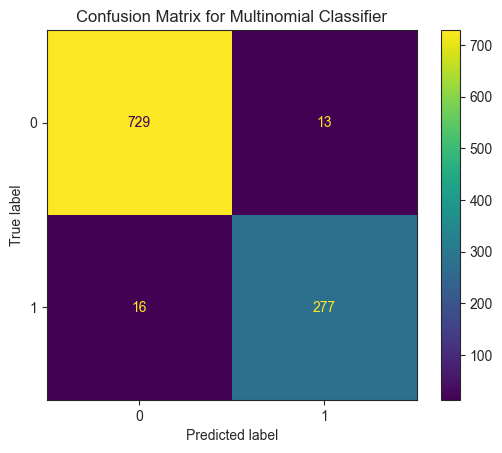

In [93]:
#
sns.set_style('ticks')
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot()
plt.title("Confusion Matrix for Multinomial Classifier")

Verifier est-ce-que ces emails sont-ils des spam?

Email1: 'Hey mohan, can we get together to watch footbal game tomorrow?',

Email2: 'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!'

In [95]:
# Test des emails
Email1 = 'Hey mohan, can we get together to watch footbal game tomorrow?'
Email2 = 'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!'

# Vectoriser les emails de test
emails_test_counts = vectorizer.transform([Email1, Email2])

# Prédire les labels pour les emails de test
predictions = classifier.predict(emails_test_counts)

print('Email 1:', predictions[0])  # Afficher la prédiction pour Email1
print('Email 2:', predictions[1])  # Afficher la prédiction pour Email2


Email 1: 0
Email 2: 1


Fin.